# show-cleaned-split-textline
Clean and split user's string of grayscale, handwritten letters

Currently using a hardcoded CSV source of letters

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
import copy

In [3]:
import clean_split_textline
csv_whitened_2, split_letters = clean_split_textline.main()

In [4]:
def resize_uniform(letter, edgesize=100):
    '''Resize a letter to uniform dimensions'''
    '''Letter's proportions are preserved.'''
    
    # Letters seem worse with edgesize 50, but there's no change from 100 to 200
    # Nevertheless, we'll give user the choice
    #edgesize = 100 
    
    # Step 1: Height of the new array is (edgesize) pixels;
    # proportionality of dimensions is unchanged.

    new_xmax = int(edgesize * letter.shape[1]/letter.shape[0])
    newletter = np.zeros((edgesize, new_xmax), dtype=int)

    for i in range(edgesize):
        for j in range(new_xmax):
            newletter[i][j] = letter[
                int(np.round(letter.shape[0] * i/edgesize))][
                int(np.round(letter.shape[1] * j/new_xmax))
            ]

    # Step 2: Pad newletter such that width = edgesize
    padwidth_l = int((edgesize - newletter.shape[1]) / 2)
    padwidth_r = edgesize - newletter.shape[1] - padwidth_l
    padding_l = np.full( (edgesize, padwidth_l), 255, dtype=int)
    padding_r = np.full( (edgesize, padwidth_r), 255, dtype=int)
    letter_padded = np.concatenate((padding_l, newletter, padding_r), axis=1)
    return letter_padded

In [5]:
def show_letters(letters, title):
    # Determine number of columns, rows in subplots of the separated letters, 
    # Formula for nrows depends on whether no. images is an integral multiple of ncols
    numletters = len(letters)
    ncols = 5; nrows = numletters // ncols + numletters % ncols

    # Display the split letters
    plt.figure(figsize=(10, 4), layout='constrained')
    for i in range(numletters):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(letters[i], cmap="gray")
        plt.title(str(i+1)+ " / " + str(numletters))
    plt.suptitle(title, fontsize="x-large", fontweight="demibold")
    plt.show()

### Print the letters: unsplit, split and resized

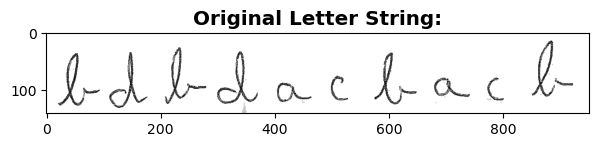

In [6]:
# Show the original text line
plt.figure(figsize=(7, 7))
plt.imshow(csv_whitened_2, cmap='gray')
plt.title("Original Letter String:", 
          fontsize="x-large", fontweight="demibold")
plt.show()

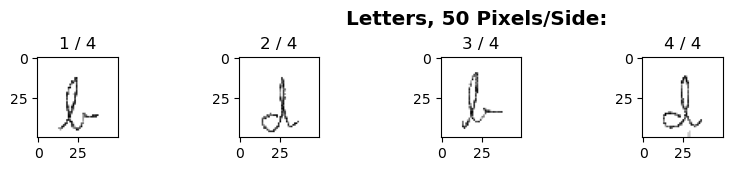

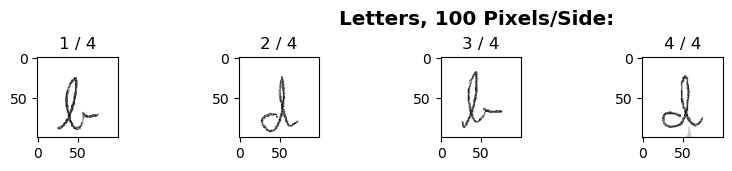

In [7]:
# Resize letters to uniform dimensions and show
for edge_size in [50, 100]:
    letters_resized = \
        [resize_uniform(split_letters[i], 
        edgesize=edge_size) for i in range(4)]
    show_letters(letters_resized, "Letters, " + \
             str(edge_size) + " Pixels/Side:")
